In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
import FinanceDataReader as fdr

In [3]:
df = fdr.DataReader('BTC/USD', '2020', '2025')
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-21,67164.914063,68372.906250,65842.296875,68154.523438,68154.523438,2.665219e+10
2024-07-22,68152.976563,68480.062500,66611.296875,67585.250000,67585.250000,4.264911e+10
2024-07-23,67584.804688,67779.015625,65484.460938,65927.671875,65927.671875,3.560567e+10
2024-07-24,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-25,65370.265625,65589.984375,65370.265625,65589.984375,65589.984375,2.776143e+10


In [4]:
df.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
# df = df.iloc[:-2]
# df.tail()

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,1.856566e+10
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,2.080208e+10
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,0.032204,0.028099,0.045636,0.032731,0.032731,0.038290
1,0.032316,0.027483,0.042071,0.029579,0.029579,0.044761
2,0.029112,0.030429,0.041769,0.034855,0.034855,0.065908
3,0.034414,0.030629,0.047638,0.035821,0.035821,0.037939
4,0.035370,0.032340,0.048991,0.035831,0.035831,0.041645


In [8]:
# 과거 10일 간의 비트코인 가격데이터를 가지고, 다음 날 비트코인 종가가격을 예측한다..

In [9]:
df.drop('Adj Close', axis=1, inplace=True)

In [10]:
df

,Open,High,Low,Close,Volume
0,0.032204,0.028099,0.045636,0.032731,0.038290
1,0.032316,0.027483,0.042071,0.029579,0.044761
2,0.029112,0.030429,0.041769,0.034855,0.065908
3,0.034414,0.030629,0.047638,0.035821,0.037939
4,0.035370,0.032340,0.048991,0.035831,0.041645
...,...,...,...,...,...
1663,0.913121,0.921407,0.918310,0.927635,0.061686
1664,0.927635,0.922974,0.929749,0.919277,0.107969
1665,0.919289,0.912727,0.912987,0.894941,0.087590
1666,NaN,NaN,NaN,NaN,NaN


In [11]:
# x
# 과거 10이간 가격 데이터

# y
# 다음 날 종가

In [12]:
window_size=10

x = []
y = []

for i in range(len(df)-window_size-1):
  x.append(df.iloc[i:i+10, :])
  y.append(df.iloc[i+10+1, 3])

In [13]:
x

[       Open      High       Low     Close    Volume
 0  0.032204  0.028099  0.045636  0.032731  0.038290
 1  0.032316  0.027483  0.042071  0.029579  0.044761
 2  0.029112  0.030429  0.041769  0.034855  0.065908
 3  0.034414  0.030629  0.047638  0.035821  0.037939
 4  0.035370  0.032340  0.048991  0.035831  0.041645
 5  0.035370  0.035810  0.049122  0.041085  0.051919
 6  0.040632  0.041603  0.054461  0.046877  0.067806
 7  0.046409  0.044797  0.057265  0.045646  0.076211
 8  0.045239  0.040201  0.055564  0.042698  0.054146
 9  0.042242  0.041432  0.053844  0.046919  0.067653,
         Open      High       Low     Close    Volume
 1   0.032316  0.027483  0.042071  0.029579  0.044761
 2   0.029112  0.030429  0.041769  0.034855  0.065908
 3   0.034414  0.030629  0.047638  0.035821  0.037939
 4   0.035370  0.032340  0.048991  0.035831  0.041645
 5   0.035370  0.035810  0.049122  0.041085  0.051919
 6   0.040632  0.041603  0.054461  0.046877  0.067806
 7   0.046409  0.044797  0.057265  0.0

In [13]:
x = np.array(x)
y = np.array(y)

In [14]:
x[:10]

array([[[0.03220354, 0.02809918, 0.0456358 , 0.03273084, 0.03829017],
        [0.03231605, 0.02748275, 0.04207066, 0.02957865, 0.0447606 ],
        [0.02911198, 0.03042875, 0.04176909, 0.03485541, 0.06590823],
        [0.03441404, 0.03062856, 0.04763752, 0.03582105, 0.03793896],
        [0.03536996, 0.03234025, 0.04899146, 0.03583075, 0.04164459],
        [0.03536997, 0.03580965, 0.04912173, 0.0410853 , 0.05191892],
        [0.04063211, 0.04160268, 0.05446086, 0.04687678, 0.06780563],
        [0.04640873, 0.0447966 , 0.05726549, 0.04564603, 0.07621118],
        [0.04523888, 0.04020071, 0.05556423, 0.0426981 , 0.05414591],
        [0.04224243, 0.04143223, 0.05384426, 0.04691879, 0.06765314]],

       [[0.03231605, 0.02748275, 0.04207066, 0.02957865, 0.0447606 ],
        [0.02911198, 0.03042875, 0.04176909, 0.03485541, 0.06590823],
        [0.03441404, 0.03062856, 0.04763752, 0.03582105, 0.03793896],
        [0.03536996, 0.03234025, 0.04899146, 0.03583075, 0.04164459],
        [0.0353699

In [15]:
y[:10]

array([0.04729963, 0.04659051, 0.05662638, 0.05632168, 0.05509982,
       0.05811323, 0.05831541, 0.05484229, 0.05412873, 0.0554244 ])

In [16]:
len(x)

1656

In [17]:
len(y)

1656

In [18]:
x.shape

(1656, 10, 5)

In [19]:
# train, test 분리...

In [20]:
x_train = x[:1400]
x_test = x[1400:]

y_train = y[:1400]
y_test = y[1400:]

In [21]:
# Dense

In [22]:
model = Sequential()
model.add(Flatten(input_shape=(10, 5)))
model.add(Dense(200))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(20))
model.add(Dense(10))
model.add(Dense(1))
model.summary()

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,591 (142.93 KB)

 Trainable params: 36,591 (142.93 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='mse')

In [24]:
hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=10)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0749 - val_loss: 0.0030
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5501e-04 - val_loss: 0.0012
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6267e-04 - val_loss: 0.0011
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1633e-04 - val_loss: 0.0015
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0120
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6501e-04 - val_loss: 0.0036
Epoch 9/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7622e-04 - val_loss: 0.0014
Epoch 11/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2824e-04 - val_loss: 0.0010
Epoch 12/100
140/

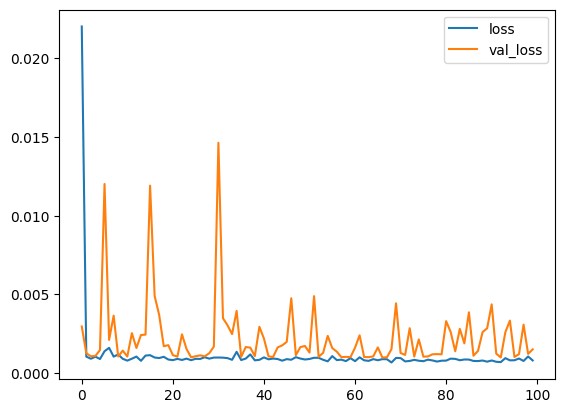

In [25]:
plt.figure()
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [26]:
preds = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [27]:
y_test

array([0.47103882, 0.4629322 , 0.44876869, 0.4831667 , 0.4578291 ,
       0.46431708, 0.46415587, 0.4759135 , 0.47724086, 0.45282332,
       0.47658581, 0.47449047, 0.48081323, 0.48193654, 0.47727263,
       0.47396997, 0.48244002, 0.48284238, 0.4807026 , 0.49503185,
       0.50659477, 0.51396577, 0.54335393, 0.57419326, 0.56928664,
       0.56262443, 0.57545519, 0.56898625, 0.56977486, 0.53254441,
       0.53557454, 0.5567236 , 0.55867963, 0.54261486, 0.54717142,
       0.53431841, 0.55280064, 0.54761789, 0.56790371, 0.57108817,
       0.57297842, 0.56918531, 0.5585643 , 0.56732953, 0.55128644,
       0.56482948, 0.55286402, 0.54510551, 0.54594969, 0.54753949,
       0.57546591, 0.58707368, 0.55609866, 0.57565075, 0.57539778,
       0.57285059, 0.57217381, 0.61662081, 0.60442377, 0.61158906,
       0.60778373, 0.55617195, 0.55601361, 0.54065505, 0.55116262,
       0.56060251, 0.55454941, 0.532812  , 0.53804374, 0.53873641,
       0.53697755, 0.50705042, 0.51201548, 0.5154146 , 0.51331

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(y_test, preds)

0.948955856779631

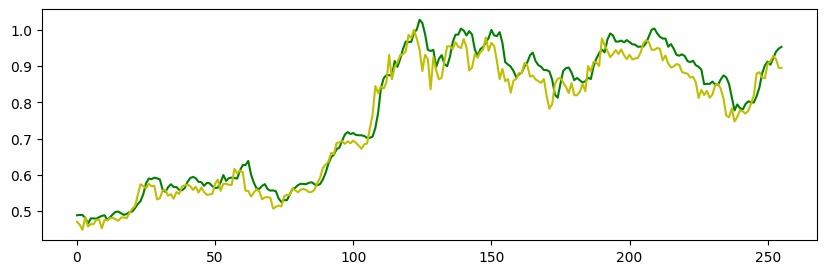

In [30]:
plt.figure(figsize=(10,3))
plt.plot(preds, c='g')
plt.plot(y_test, c='y')

In [31]:
# LSTM

In [ ]:
model=Sequential()
model.add(LSTM(256,input_shape=(10,5)))
model.add(Dense(50))
model.add(Dense(20))
model.add(Dense(10))
model.add(Dense(1))
model.summary()

In [32]:
model.compile(optimizer='adam',loss='mse')

In [33]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),batch_size=5)

Epoch 1/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.4683e-04 - val_loss: 0.0016
Epoch 2/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7540e-04 - val_loss: 0.0011
Epoch 4/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 5/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9867e-04 - val_loss: 0.0048
Epoch 6/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2013e-04 - val_loss: 0.0037
Epoch 7/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 8/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6561e-04 - val_loss: 0.0023
Epoch 9/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3406e-04 - val_loss: 0.0048
Epoch 10/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.1518e-04 - val_loss: 0.0011
Epoch 11/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5068e-04 - val_loss: 0.0011
Epoch 12/

In [35]:
pred=model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [36]:
r2_score(y_test,pred)

0.9533829932329868